# Игры — Анализ рекламных источников

## Цель 
Выяснить, через какие источники приходять самые активные пользователи

<h3>Шаг 1. <a href='#session1'>Изучение данных и приведение данных в порядок</a></h3>
<h4>Шаг 1.1<a href='#session1.1'>Обработка пропусков</a></h4>
<h4> Шаг 1.2 <a href='#session1.2'>Обработка дубликатов</a></h4>
<h4> Шаг 1.3 <a href='#session1.3'>Приведение типов данных</a></h4>
<h3>Шаг 2.<a href='#session2'> Зависимость поведения от источника перехода</a></h3>
<h4> Шаг 2.1<a href='#session2.1'> Изучить распределение типов событий **event** по источникам **source**</a></h4>
<h4> Шаг 2.2 <a href='#session2.2'>Изучить распределение типов зданий **building_type** по источникам **source**</a></h4>
<h4> Шаг 2.3 <a href='#session2.3'>Доля пользователей, совершивших хотя бы одно событие **event** (с учетом **source**)</a></h4>
<h4> Шаг 2.4 <a href='#session2.4'>Конверсия источников трафика</a></h4>
<h4> Шаг 2.5 <a href='#session2.5'>Распределение типов зданий по пользователям, которые выполнили **project**</a></h4>
<h4> Шаг 2.6 <a href='#session2.6'>Распределение типов зданий по пользователям, которые выполнили победили врага</a></h4>
<h3> Шаг 3. <a href='#session3'>Проверка гипотез</a></h3>
<h4> Шаг 3.1 <a href='#session3.1'>Время завершения уровня различается в зависимости от способа прохождения</a></h4>
<h4> Шаг 3.2 <a href='#session3.2'>Время завершения уровня различается в зависимости от источника перехода</a></h4>
<h3> Шаг 4. <a href='#session4'>Посчитаем медианную стоимость кликов каналов</a></h3>
<h3> Шаг 5. <a href='#session5'>Вывод</a></h3>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

<a id='session1'><a/>
### Шаг 1. Изучение данных и приведение данных в порядок

In [15]:
#game_actions = pd.read_csv('/datasets/game_actions.csv')
#user_source = pd.read_csv('/datasets/user_source.csv')
#ad_cost = pd.read_csv('/datasets/ad_costs.csv')

In [16]:
game_actions = pd.read_csv(r'C:\Users\user2\Desktop\Финал_проект\проет\game_actions.csv')
user_source = pd.read_csv(r'C:\Users\user2\Desktop\Финал_проект\проет\user_source.csv')
ad_cost = pd.read_csv(r'C:\Users\user2\Desktop\Финал_проект\проет\ad_costs.csv')

In [17]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [18]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [19]:
ad_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


<a id='session1.1'></a>
#### Обработка пропусков

В game_actions.building_type пропуски обусловлены тем, что пользователь не строил зданий.  
В game_actions.project_type пропуски обусловлены тем, что пользователь не выполнял проект.  
Удалять пропуски не нужно.

<a id='session1.2'></a>
#### Обработка дубликатов

In [20]:
game_actions.duplicated().sum()

1

In [21]:
game_actions[game_actions.duplicated(keep = False)].sort_values(by = game_actions.columns.tolist())

,event_datetime,event,building_type,user_id,project_type
74890,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


In [22]:
# Удалим дубликат
game_actions.drop_duplicates(inplace=True)

In [23]:
user_source.duplicated().sum()

0

In [24]:
ad_cost.duplicated().sum()

0

#### Вывод
Дубликат найден в game_actions и удален

<a id='session1.3'></a>
#### Приведение типов данных

In [25]:
# Заменим тив в нужных столбцах на дату
game_actions['event_datetime']=pd.to_datetime(game_actions['event_datetime'])
ad_cost['day']=pd.to_datetime(ad_cost['day'])

<a id='session2'></a>
### Зависимость поведения от источника перехода

<a id='session2.1'></a>
#### Изучить распределение типов событий **event** по источникам **source**

In [26]:
# Соединим нужные иаблицы
game_actions_user = game_actions.merge(user_source, on='user_id')
game_actions_user_group = game_actions_user.groupby(['source','event']).agg({'user_id':'count'})

In [27]:
game_actions_user_pivot = game_actions_user.pivot_table(index=['source','event'],values='user_id',aggfunc='count').reset_index()

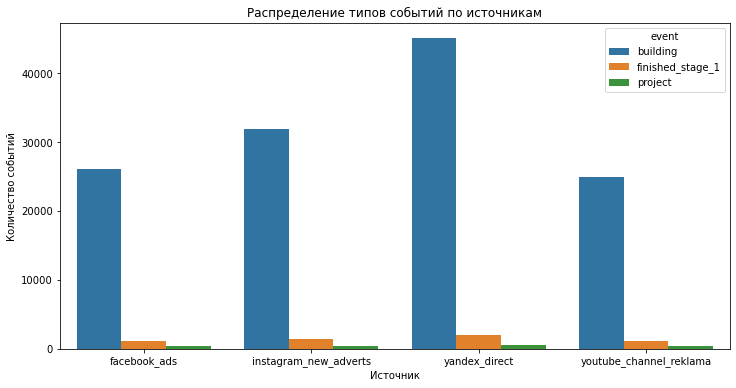

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(data = game_actions_user_pivot,x='source',y='user_id', hue='event')
plt.title('Распределение типов событий по источникам')
plt.ylabel('Количество событий')
plt.xlabel('Источник');

#### Вывод
Типы событий распределены по источникам одинаково. Зеачит вовлеченность пользвоателей из разных источников одинаковая 

<a id='session2.2'></a>
#### Изучить распределение типов зданий **building_type** по источникам **source**

In [29]:
game_actions_user_pivot = game_actions_user.pivot_table(index=['source','building_type'],values='user_id',aggfunc='count').reset_index()\
.sort_values('user_id')

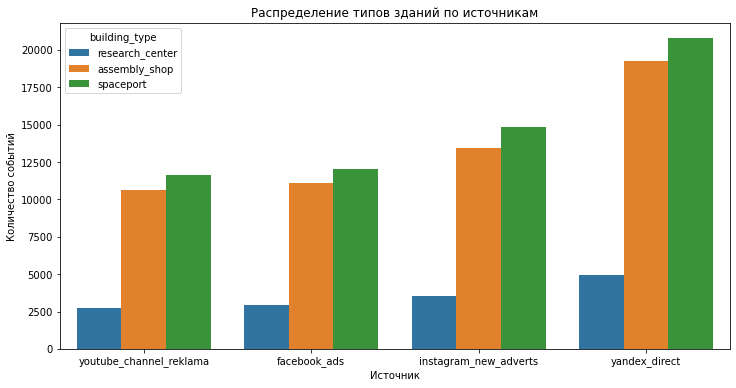

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(data = game_actions_user_pivot,x='source',y='user_id', hue='building_type')
plt.title('Распределение типов зданий по источникам')
plt.ylabel('Количество событий')
plt.xlabel('Источник');

#### Вывод
Типы зданий одинаково распределени по источникам  
Почти никто не строит reserch_center, возможно он самый ресурсозатратный по постройке или дает меньше всего бонусов, это поле для отдельного исследования

<a id='session2.3'></a>
#### Доля пользователей, совершивших хотя бы одно событие **event**

In [31]:
# Соединим таблицы левым соединением, чтобы убедиться что мы взяли всех, пришедших пользвоателей.
game_actions_user_left = user_source.merge(game_actions,on='user_id',how='left')

In [32]:
game_actions_user_left['event'].isnull().sum()

0

#### Вывод
Все пользвоатели совершили хотябы одно событие  
Доля 100%

<a id='session2.4'></a>
#### Конверсия источников трафика

In [33]:
# Отфильтруем по каналам
source_yandex_direct = game_actions_user_left[game_actions_user_left['source']=='yandex_direct']
instagram_new_adverts_direct = game_actions_user_left[game_actions_user_left['source']=='instagram_new_adverts']
facebook_ads_direct = game_actions_user_left[game_actions_user_left['source']=='facebook_ads']
youtube_channel_reklama_direct = game_actions_user_left[game_actions_user_left['source']=='youtube_channel_reklama']

In [34]:
# Создадим списки для цикла
source_list = [source_yandex_direct,instagram_new_adverts_direct,facebook_ads_direct,youtube_channel_reklama_direct]
source_list_name = ['yandex_direct','instagram_new_adverts','facebook_ads','youtube_channel_reklama']

In [35]:
for i,j in zip(source_list,source_list_name):
    user_count = i['user_id'].nunique()
    user_level_done_count = i[i['event']=='finished_stage_1']['user_id'].nunique()
    conversion = round(user_level_done_count / user_count,2)
    print(f'Конверсия пользователей {j} равна {conversion*100}%')

Конверсия пользователей yandex_direct равна 42.0%
Конверсия пользователей instagram_new_adverts равна 44.0%
Конверсия пользователей facebook_ads равна 42.0%
Конверсия пользователей youtube_channel_reklama равна 43.0%


<a id='session2.5'></a>
#### Распределение типов зданий по пользователям, которые выполнили **project**

In [36]:
#Отфильтруем тех, кто выполнил проект
users_done_project = game_actions_user_left[game_actions_user_left['event']=='project']

In [37]:
# Найдем все события, которые совершали выполнившие проект пользвоатели
users_done_project = game_actions_user_left.query('user_id in @users_done_project.user_id')

In [38]:
users_done_project_pivot = users_done_project.pivot_table(index=['source','building_type'],values='user_id',aggfunc='count')\
.reset_index().sort_values('user_id')

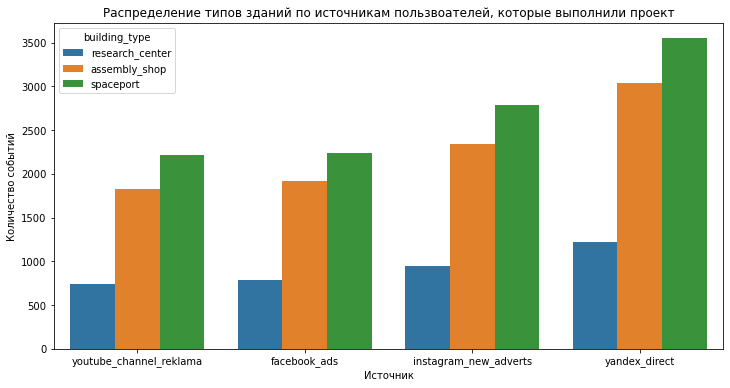

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(data = users_done_project_pivot,x='source',y='user_id', hue='building_type')
plt.title('Распределение типов зданий по источникам пользвоателей, которые выполнили проект')
plt.ylabel('Количество событий')
plt.xlabel('Источник');

#### Вывод
Среди пользваотелей, которые выполнили проект тоже не популярен research_center, но у них доля постройки этого задние выше

<a id='session2.6'></a>
#### Распределение типов зданий по пользователям, которые выполнили победить врага

In [40]:
# Выделим пользвоателей, которые победили врага
users_defeat_enemy = game_actions_user_left[game_actions_user_left['event']=='finished_stage_1'].\
query('user_id not in @users_done_project.user_id')

In [41]:
# Найдем все события, которые совершали пользователи, победившие врага
users_defeat_enemy = game_actions_user_left.query('user_id in @users_defeat_enemy.user_id')

In [42]:
users_defeat_enemy_pivot = users_defeat_enemy.pivot_table(index=['source','building_type'],values='user_id',aggfunc='count')\
.reset_index().sort_values('user_id')

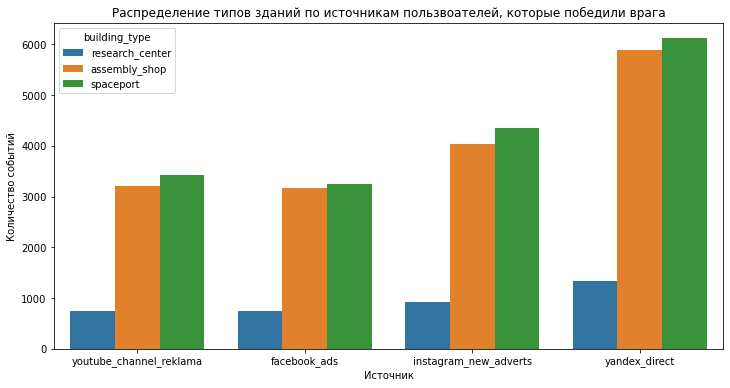

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(data = users_defeat_enemy_pivot,x='source',y='user_id', hue='building_type')
plt.title('Распределение типов зданий по источникам пользвоателей, которые победили врага')
plt.ylabel('Количество событий')
plt.xlabel('Источник');

#### Вывод
По распределению видно, что пользвоатели не любят строить research_center, что-то с ним не так

### Стоимость привлечения пользователя

In [44]:
ad_cost.rename(columns={'day':'date'},inplace=True)

In [45]:
# Создадим поле с датой события без времени
game_actions_user_left['date'] = game_actions_user_left['event_datetime'].dt.date
game_actions_user_left['date'] = pd.to_datetime(game_actions_user_left['date'])

In [46]:
# Найдем дату первого события пользвоателя
first_user_date = game_actions_user_left.groupby(['source','user_id'])['date'].min().reset_index()

In [47]:
# Считаем количество пользвоателей, пришедгих за день
count_users_per_day = first_user_date.groupby(['source','date'])['user_id'].nunique().reset_index()

In [48]:
# Соединим таблицы
cost_user_source = pd.merge(ad_cost,count_users_per_day, left_on=['source','date'],right_on=['source','date'])

In [49]:
# Найдем стоимость клика в день в конкретном источнике
cost_user_source['cost_one_user'] = cost_user_source['cost']/cost_user_source['user_id']

In [50]:
cost_user_source.groupby('source')['cost_one_user'].mean()

source
facebook_ads               0.467194
instagram_new_adverts      0.390205
yandex_direct              0.274126
youtube_channel_reklama    0.245682
Name: cost_one_user, dtype: float64

#### Вывод
Самый эффективный по стоимости присвлечения youtube_channel_reklama

### Retention rate

In [51]:
# Найдем дату первого посещения
first_date = game_actions_user_left.groupby(['user_id'])['date'].min()
first_date.name = 'first_date'

In [52]:
# Соединим таблицу с датой первого события с основной
game_actions_user_left = game_actions_user_left.join(first_date,on='user_id')

In [53]:
# У нас данные за 5 недель, поэтому retention расчитаем по неделям
game_actions_user_left['week'] = pd.to_datetime(game_actions_user_left['date'], unit='d') -\
pd.to_timedelta(game_actions_user_left['date'].dt.dayofweek, unit='d')

game_actions_user_left['first_week'] = pd.to_datetime(game_actions_user_left['first_date'], unit='d') -\
pd.to_timedelta(game_actions_user_left['first_date'].dt.dayofweek, unit='d') 

In [54]:
# Считаем лайфтайм
game_actions_user_left['cohort_lifetime'] = game_actions_user_left['week'] - game_actions_user_left['first_week']
game_actions_user_left['cohort_lifetime'] = game_actions_user_left['cohort_lifetime'] / np.timedelta64(1,'W')
game_actions_user_left['cohort_lifetime'] = game_actions_user_left['cohort_lifetime'].astype('int') 

In [55]:
cohorts = game_actions_user_left.groupby(['first_week','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index() 

In [56]:
# Считаем изначальное коилчество в когорте 
start_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_week','user_id']]
start_users_count = start_users_count.rename(columns={'user_id':'cohort_users'}) 

In [57]:
# Соединим таблицы с начальным количеством пользоывателей с текущим
cohorts = cohorts.merge(start_users_count,on='first_week')

In [58]:
# Считаем ретеншн
cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users'] 

In [59]:
retention_pivot = cohorts.pivot_table(index='first_week',columns='cohort_lifetime',values='retention',aggfunc='sum')
# Удалим данные по нулевой неделе
retention_pivot = retention_pivot.drop(retention_pivot.columns[0],axis='columns')

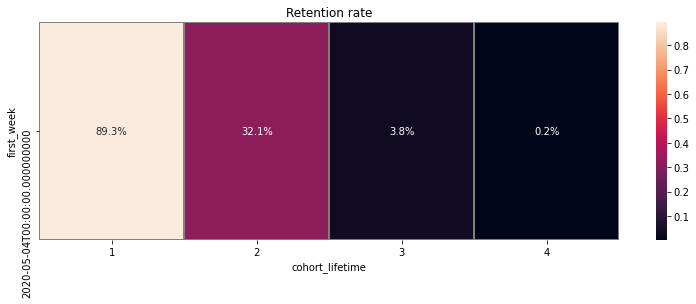

In [60]:
# Строим хитмэп
plt.figure(figsize=(13,4))
plt.title('Retention rate')
plt.xlabel('lifetime')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

### Вывод
Данные у нас по пользователям, пришедшим в одну неделю.  
Через месяц у нас остается 0,2% пользвоателей, нужно развивать функционал игры.

<a id = 'session3'></a>
### Проверка гипотез

<a id='session3.1'></a>
#### Время завершения уровня различается в зависимости от способа прохождения

##### Сформулируем гепотизы
H0 - Выборки одинаковы в рамках статистической значимости  
H1 - Выборки различаюстя в рамках статистической значимости  
Для теста выберем тест Мана-Уитни, так распределение ненормальное

In [61]:
# Отфтльтруем по событиям окончания уровня
users_done_project_lvl_done = game_actions_user_left[game_actions_user_left['event']=='project']

users_defeat_enemy_lvl_done = game_actions_user_left[game_actions_user_left['event']=='finished_stage_1'].\
query('user_id not in @users_done_project_lvl_done.user_id')

In [62]:
# Выделим дату и преобразуем в соответствующий тип
users_done_project_lvl_done['event_date'] = pd.to_datetime(users_done_project_lvl_done['event_datetime']).dt.date
users_done_project_lvl_done['event_date'] = pd.to_datetime(users_done_project_lvl_done['event_date'])

users_defeat_enemy_lvl_done['event_date'] = pd.to_datetime(users_defeat_enemy_lvl_done['event_datetime']).dt.date
users_defeat_enemy_lvl_done['event_date'] = pd.to_datetime(users_defeat_enemy_lvl_done['event_date'])

In [63]:
# Соединим с таблицей с датасм первого события
users_done_project_lvl_done = users_done_project_lvl_done.join(first_date,on='user_id',lsuffix='_left', rsuffix='_right')
users_defeat_enemy_lvl_done = users_defeat_enemy_lvl_done.join(first_date,on='user_id',lsuffix='_left', rsuffix='_right')

In [64]:
# Найдем разницу в днях
users_done_project_lvl_done['period'] = (users_done_project_lvl_done['event_date']-users_done_project_lvl_done['first_date_left']).dt.days
users_defeat_enemy_lvl_done['period'] = (users_defeat_enemy_lvl_done['event_date']-users_defeat_enemy_lvl_done['first_date_left']).dt.days

In [65]:
print("Стат. значимость времени завершения уровня в зависимости от стратегии {0:.30f}".format(stats.mannwhitneyu(users_done_project_lvl_done['period'],users_defeat_enemy_lvl_done['period'])[1]))

Стат. значимость времени завершения уровня в зависимости от стратегии 0.000000000001893707561472180250


In [66]:
print('Пользвоатели выбирают стратегию победы над врагом чаще в',round(users_defeat_enemy_lvl_done['user_id'].nunique()/users_done_project_lvl_done['user_id'].nunique(),2))

Пользвоатели выбирают стратегию победы над врагом чаще в 2.12


In [67]:
print('Почтситаем экстримальные значения для users_defeat_enemy_lvl_done',users_defeat_enemy_lvl_done['period'].quantile([0.1,0.9]))
print('Почтситаем экстримальные значения для users_done_project_lvl_done',users_done_project_lvl_done['period'].quantile([0.1,0.9]))

Почтситаем экстримальные значения для users_defeat_enemy_lvl_done 0.1     6.0
0.9    16.0
Name: period, dtype: float64
Почтситаем экстримальные значения для users_done_project_lvl_done 0.1     8.0
0.9    17.0
Name: period, dtype: float64


In [68]:
# Избавимся от выбросов
users_done_project_lvl_done_withouy_extrim = users_done_project_lvl_done.query('period > 8 and period < 17')
users_defeat_enemy_lvl_done_withouy_extrim = users_defeat_enemy_lvl_done.query('period > 6 and period < 17')

In [69]:
# Почтитаем относительную разницу времени прохождения
print(round(users_done_project_lvl_done_withouy_extrim['period'].mean()/users_defeat_enemy_lvl_done_withouy_extrim['period'].mean(),2))

1.08


#### Вывод
Время окончания уровня зависит от стратегии прохождения.  
Нет оснований отвергать H1

<a id='session3.2'></a>
#### Время завершения уровня различается в зависимости от источника перехода

In [70]:
# Выделим время и преобразуем в соответствующий тип
source_yandex_direct['event_date'] = pd.to_datetime(source_yandex_direct['event_datetime']).dt.date
source_yandex_direct['event_date'] = pd.to_datetime(source_yandex_direct['event_date'])
                                                  
instagram_new_adverts_direct['event_date'] = pd.to_datetime(instagram_new_adverts_direct['event_datetime']).dt.date
instagram_new_adverts_direct['event_date'] = pd.to_datetime(instagram_new_adverts_direct['event_date'])

facebook_ads_direct['event_date'] = pd.to_datetime(facebook_ads_direct['event_datetime']).dt.date
facebook_ads_direct['event_date'] = pd.to_datetime(facebook_ads_direct['event_date'])

youtube_channel_reklama_direct['event_date'] = pd.to_datetime(youtube_channel_reklama_direct['event_datetime']).dt.date
youtube_channel_reklama_direct['event_date'] = pd.to_datetime(youtube_channel_reklama_direct['event_date'])

In [71]:
# Соединим таблицы с датами первого события
source_yandex_direct = source_yandex_direct.join(first_date,on='user_id')
instagram_new_adverts_direct = instagram_new_adverts_direct.join(first_date,on='user_id')
facebook_ads_direct = facebook_ads_direct.join(first_date,on='user_id')
youtube_channel_reklama_direct = youtube_channel_reklama_direct.join(first_date,on='user_id')

In [72]:
# Отфильтруем события окончания первого уровня
source_yandex_direct_final = source_yandex_direct[source_yandex_direct['event']=='finished_stage_1']
instagram_new_adverts_direct_final = instagram_new_adverts_direct[instagram_new_adverts_direct['event']=='finished_stage_1']
facebook_ads_direct_final = facebook_ads_direct[facebook_ads_direct['event']=='finished_stage_1']
youtube_channel_reklama_direct_final = youtube_channel_reklama_direct[youtube_channel_reklama_direct['event']=='finished_stage_1']

In [73]:
# Считаем период прохождения
source_yandex_direct_final['period'] = (source_yandex_direct_final['event_date']-source_yandex_direct_final['first_date']).dt.days
instagram_new_adverts_direct_final['period'] = (instagram_new_adverts_direct_final['event_date']-instagram_new_adverts_direct_final['first_date']).dt.days
facebook_ads_direct_final['period'] = (facebook_ads_direct_final['event_date']-facebook_ads_direct_final['first_date']).dt.days
youtube_channel_reklama_direct_final['period'] = (youtube_channel_reklama_direct_final['event_date']-youtube_channel_reklama_direct_final['first_date']).dt.days

In [74]:
# Проведем тесты
print("Стат. значимость времени завершения уровня yandex instagram {0:.3f}".format(stats.mannwhitneyu(source_yandex_direct_final['period'],instagram_new_adverts_direct_final['period'])[1]))
print("Стат. значимость времени завершения уровня yandex facebook {0:.3f}".format(stats.mannwhitneyu(source_yandex_direct_final['period'],facebook_ads_direct_final['period'])[1]))
print("Стат. значимость времени завершения уровня yandex youtube {0:.3f}".format(stats.mannwhitneyu(source_yandex_direct_final['period'],youtube_channel_reklama_direct_final['period'])[1]))
print("Стат. значимость времени завершения уровня instagram facebook {0:.3f}".format(stats.mannwhitneyu(instagram_new_adverts_direct_final['period'],facebook_ads_direct_final['period'])[1]))
print("Стат. значимость времени завершения уровня instagram youtube {0:.3f}".format(stats.mannwhitneyu(instagram_new_adverts_direct_final['period'],youtube_channel_reklama_direct_final['period'])[1]))
print("Стат. значимость времени завершения уровня facebook youtube {0:.3f}".format(stats.mannwhitneyu(facebook_ads_direct_final['period'],youtube_channel_reklama_direct_final['period'])[1]))

Стат. значимость времени завершения уровня yandex instagram 0.207
Стат. значимость времени завершения уровня yandex facebook 0.410
Стат. значимость времени завершения уровня yandex youtube 0.170
Стат. значимость времени завершения уровня instagram facebook 0.317
Стат. значимость времени завершения уровня instagram youtube 0.430
Стат. значимость времени завершения уровня facebook youtube 0.260


#### Вывод
Время прохождения уровня пользваотелями из разных источников не отличается
Нет оснований отвергать H0

<a id='session5'></a>
### Вывод  
Лучше расширять рекламную компанию в youtube_channel_reklama, конверсия 43%, и самая дешевая стоимость клика.  
Между стратегиями проходжения есть статистически значимая разница. Те, кто выбрал стратегию проекта, в среднем, проходят уровень медленее в 1.08 раз.  
Пользвоатели выбирают стратегию победы над врагом чаще в 2.12 раз, нужно придумать, как сделать проект интереснее, чтобы сбалансировать сложность стратегий.


*Под конверсией имеется ввиду доля прошедших 1-ый уровень